# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 13 : Subspace Models, Principal Component Analysis </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> October 8, 2018 </center>

# COMP 562  – Lecture 13

Plan for today

1. Mixture Models Vs. Latent Linear Models
2. Principal Component Analysis (PCA)
3. Eigen-decomposition and Singular Value Decomposition (SVD)

$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
$$

# Last Time -- Mixture Models

In **Mixture Models**, each sample by its cluster membership and learned cluster parameters

<img src="./Images/GMM.png" width="600" align="center"/>

* Problem: only use a single latent variable to generate the samples
* Each sample can only come from one of K components (clusters)
* Because components are mutually exclusive, limiting its representational power

# Curse of Dimensionality 

* Machine learning methods are statistical by nature
    * Count observations in various regions of some space to construct the predictors
    
* As dimensionality grows: fewer observations per region
 * 1D: 3 regions, 2D: $3^2$ regions, 1000D – hopeless
 * Good statistics need repetition
     * Flip a coin once --> head --> P(head) = 100%?!!
  
<img src="./Images/Curse.png" width="1000" align="center"/>

# How to Reduce Dimensionality

* Goal: represent samples with fewer dimensions (variables)
    * Unsupervised: preserve as much structure in the data as possible
    * Supervised: only structure affecting class separability
* Feature selection
    * Unsupervised: Pick a subset of the original dimensions $X_1, \color{red}{X_2}, X_3, ..., \color{red}{X_{d-1}}, X_d$
    * Supervised: pick good class “predictors” (e.g. information gain)
* Feature extraction
    * Unsupervised: Construct a new set of dimensions that preserve most of variability in original data
        * $\color{red}{Z_i} = f(X_1,X_2, ...  X_d)$ where $i = 1,2,...,L$ and $L < d$
        * (linear) combinations of original -- **principal component analysis (PCA)**
    * Supervised: construct new dimensions that would increase class seprability

# Latent Linear (Subspace) Models

**In Subspace Models**, each sample is represented using a weighted sum of learned basis

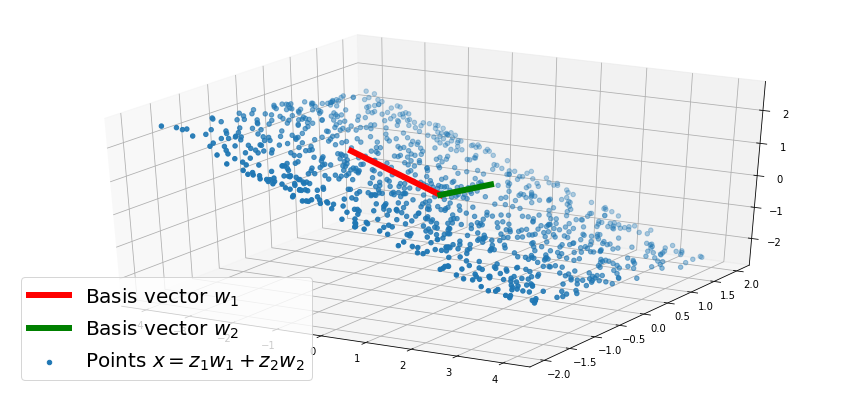

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(3)
# basis vectors
v1 = np.asarray([-2.0,0.0,1.0])
v2 = np.asarray([0.0,1.0,-0.3])
# coordinates in subspace
z1 = 4.0*np.random.rand(1000,1) - 2.0
z2 = 4.0*np.random.rand(1000,1) - 2.0
xs =  z1*v1 + z2*v2
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs[:,0],xs[:,1],xs[:,2],label='Points $x = z_1 w_1 + z_2 w_2$')
ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]],color='r',linewidth=6,label='Basis vector $w_1$')
ax.plot([0,v2[0]],[0,v2[1]],[0,v2[2]],color='g',linewidth=6,label='Basis vector $w_2$')
ax.legend(loc=3,fontsize=20);
def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

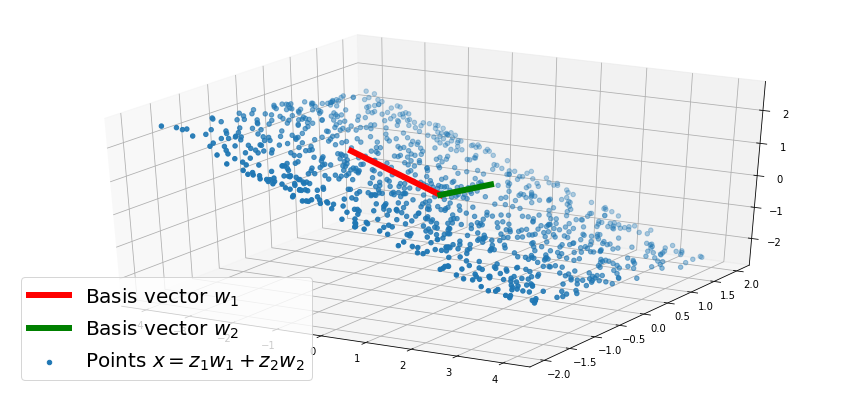

In [3]:
show_figure(fig)
plt.show()

**Dimensionality Reduction** accomplished by using no. of basis $<$ data dimensionality 

# Factor Analysis Model

Data is composed of samples $\xx_i$ of dimension $d$ 

We assume that there is a basis composed of $L$ vectors ($\WW=\left[\ww_1,...,\ww_L\right]$)

Generative model for a point $\xx$

\begin{eqnarray*}
\zz &\sim& \mathcal{N}\left(0,I\right)\\ 
\xx &\sim& \mathcal{N}\left(\mmu + \WW\zz,\Psi\right)
\end{eqnarray*}

where $\WW,\mmu,\Psi$ are parameters

We assume that $\Psi$ is diagonal -- any dependencies in $\xx$ must be accounted for by the $\WW$ and $\zz$

# Factor Analysis (FA)

<img src="./Images/FA.png" width="1200" align="center"/>

* EM algorithm is typically used to learn the parameters of the factor analysis model
* **Problem:** the learned parameters can't be uniquely determined (Unidentifiable model)

# Principal Component Analysis (PCA)

PCA is a special case of FA making these additional assumptions <a href='http://setosa.io/ev/principal-component-analysis/'>**(PCA Visual Demo)**</a>:

1. Subspace basis vectors are orthogonal ($W^TW = I$)
    - 1st principal component: direction of the greatest variability in the data
    - 2nd principal component: perpendicular to 1st, greatest variability of what's left
    - ... and so on until $d$ (original dimensionality)
    
2. Variance $\Psi = \sigma^2I$ with very small $\sigma^2$



# Principal Component Analysis (PCA)
Let:
1. Each sample $\xx_i$ be of dimension $d$
2. $\WW$ be a matrix of size $d \times L$ such that $\WW^T\WW = I$
3. And $\zz_i,i=1,...N$, vectors of length $L$

Principal Component Analysis optimizes objective
$$
J(\WW,\ZZ) = \frac{1}{N} \sum_{i=1}^N \underbrace{\norm{\xx_i - \WW\zz_i}^2}_{\textrm{reconstruction error}}
$$
Optimal solutions for $\WW$ and $\zz_t$ are given by: 
* $\WW^*$ composed of top $L$ eigenvectors of covariance matrix $\hat{\Sigma} = \frac{1}{N} \sum_{i=1}^N\xx_i\xx_i^T$
* $\zz^*_i$ is projection of $\xx_i$ onto space spanned by columns of $\WW^*$

# Principal Component Analysis -- Implementation Details 

Given $\Data = \{\xx_i : i=1,...N\}$, where samples $\xx_i$ are d-long vectors, if you want to learn how to compress these vectors into shorter $L$ long representations $\zz_i$ 
1. Compute covariance of the dataset 
 * Centered data : $\hat{\Sigma} = \frac{1}{N} \sum_{i=1}^N\xx_i\xx_i^T$, 
 * Non-centered data: $\hat{\Sigma} = \frac{1}{N} \sum_{i=1}^N(\xx_i - \mmu)(\xx_i^T - \mmu)$, where $\mmu = \frac{1}{N}\sum_i \xx_i$,  
 
2. Extract top L eigenvectors (ordered by eignvalues) of $\hat{\Sigma}$ and store them in $\WW^*$

3. Project data to the space spanned by those eigenvectors  
    1. Centered data: $\zz^*_i = (\WW^*)^T\xx_i$
    2. Non-centered data: $\zz^*_i = (\WW^*)^T(\xx_i - \mmu) + \mmu$


In [3]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
def generate_data(N,d,K,proby,mus,As=None):    
    if As is None:
        As = numpy.zeros((d,d,K))
        for k in range(K):
            As[:,:,k] = numpy.eye(d)
    ys = numpy.zeros(N,dtype='int')
    xs = numpy.zeros((d,N))
    for i in range(N):
        # Sample class according to the prior p(y)
        # in this case it is uniform
        ys[i] = numpy.random.choice(K,1)[0]      
        # Sample feature values according to p(x|y)
        # In this case, x ~ N(mmu[y[i]],sigma2*I)
        # To accomplish this, draw z1,z2 ~ N(0,I)    
        z = numpy.random.randn(2,1)
        # transform by matrix A and shift by class mean
        A = As[:,:,ys[i]].squeeze()
        mu = mus[:,ys[i]]
        Az = numpy.dot(A,z) 
        x = Az + mu[:,numpy.newaxis]
        xs[:,i] = x[:,0]
    return xs,ys
    
def plot_samples(xs,ys,mus=None,Sigmas=None,colors=['r','g','b','k','c','m'],labels=None):
    N = xs.shape[1]
    if not ys is None:        
        K = numpy.max(ys)+1        
        for c in range(K):
        # indices of samples assigned to class c
            ind = [i for i in range(N) if ys[i]==c]
            if labels is None:
                label = "Samples in cluster " + str(c)
            else:
                label = labels[c]
            plt.plot(xs[0,ind],xs[1,ind],colors[c]+'.',label=label)   
            if not mus is None:
                plt.plot(mus[0,c],mus[1,c],'wx',markersize=9,markeredgewidth=5)
                plt.plot(mus[0,c],mus[1,c],colors[c]+'x',markersize=7,markeredgewidth=3)
            if not Sigmas is None:
                plot_covariance(mus[:,c],Sigmas[:,:,c],2.0,colors[c])
        plt.legend(loc=2, bbox_to_anchor=(1,1))
    else:
        plt.plot(xs[0,:],xs[1,:],'.')

def plot_covariance(mu,Sigma,std_devs,color):
    N = 50
    alphas = numpy.linspace(0,2*numpy.pi,N)
    x = numpy.cos(alphas)
    y = numpy.sin(alphas)
    xy = numpy.vstack((x,y))
    d,v = numpy.linalg.eig(Sigma)
    d = numpy.sqrt(d)
    
        
    xy = std_devs*numpy.dot(numpy.dot(v,numpy.diag(d)),xy) + mu[:,numpy.newaxis]
    plt.plot(xy[0,:],xy[1,:],'w-',linewidth=6)
    plt.plot(xy[0,:],xy[1,:],color+':',linewidth=3)
    label = 'Eigenvectors'
    for j in range(2):
        plt.plot([mu[0],mu[0]+2.0*d[j]*v[0,j]],[mu[1],mu[1]+2.0*d[j]*v[1,j]],'k-',linewidth=6)        
        
        plt.plot([mu[0],mu[0]+2.0*d[j]*v[0,j]],[mu[1],mu[1]+2.0*d[j]*v[1,j]],color+'-',linewidth=4,label=label)        
        label = None

K = 3
d=2
mus = 10*numpy.asarray([[0.0,1.0,2.0],[0.0,0.0,0.0]])
As = numpy.asarray([[[2.0,0.0],[0.0,2.0]],
                    [[0.5,0.0],[0.0,5.0]],
                    [[2.0,-2.0],[0.0,2.0]]])
As = numpy.swapaxes(As,0,2)
Sigmas = numpy.zeros((d,d,K))
for c in range(K):
    A = As[:,:,c]
    Sigmas[:,:,c] = numpy.dot(A,A.transpose())

proby = [1./K]*K
numpy.random.seed(1)
xs,ys = generate_data(1000,2,K,proby,mus,As)

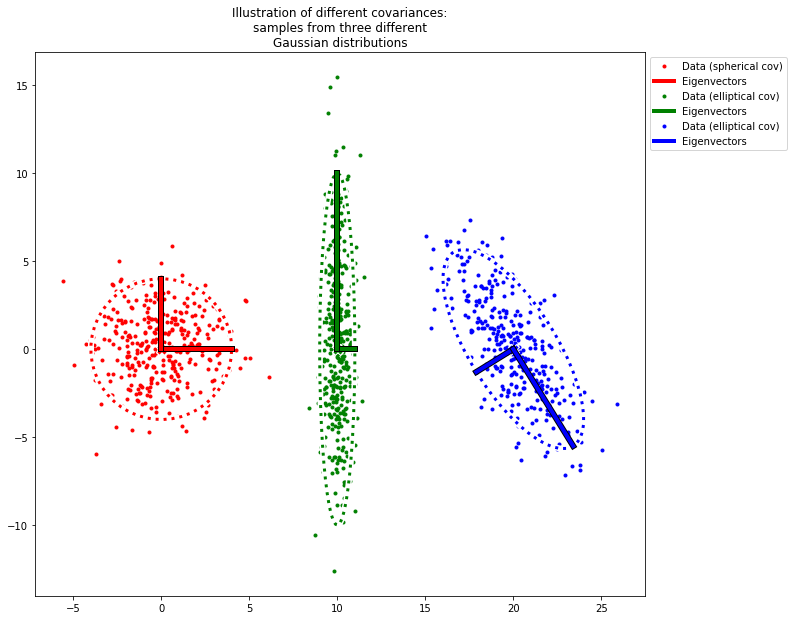

In [4]:
plt.figure(figsize=(12,10))
plot_samples(xs,ys,mus=mus,Sigmas=Sigmas, labels=['Data (spherical cov)', 'Data (elliptical cov)','Data (elliptical cov)'])
plt.axis('image')
plt.title('Illustration of different covariances:\nsamples from three different\nGaussian distributions');

# Applying PCA

1. Data is converted into a vector -- image of size $W\times H \times 3$ becomes a vector of $W*H*3$ values
2. Meaning of $j^{\tth}$ entry in a data vectors -- assume data is aligned
3. Eigenvector of covariance matrix is of same dimensionality as a data vector -- you can transform it back to the original shape
4. Make sure that you are computing the correct covariance
$$
\XX \XX^T \neq \XX^T \XX
$$
You could be looking at eigensample or eigenfeature.
5. You can visualize
  1. $\zz_i$ scores, one per sample
  2. $\ww_l$ eigenvectors or loadings
  3. $\WW\zz_i$ reconstructions, one per sample


# PCA Example -- Eign-Faces

<img src="./Images/eigenfaces.png" width="1500" align="center"/>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display 
from PIL import Image
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, data_home='.')
T, h, w = lfw_people.images.shape
print "Samples: ",T,"Height: ",h,"Width: ",w,"Features (Height*Width):",h*w
X = lfw_people.data
L= 25
data = X.reshape((T,h*w)).transpose()

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed 

C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
C:\Users\mmmos\Anaconda3\envs\Python27\lib\site-packages\sklearn\datasets\lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

Samples:  1288 Height:  62 Width:  47 Features (Height*Width): 2914


Size of Data (features,samples):  (2914L, 1288L)


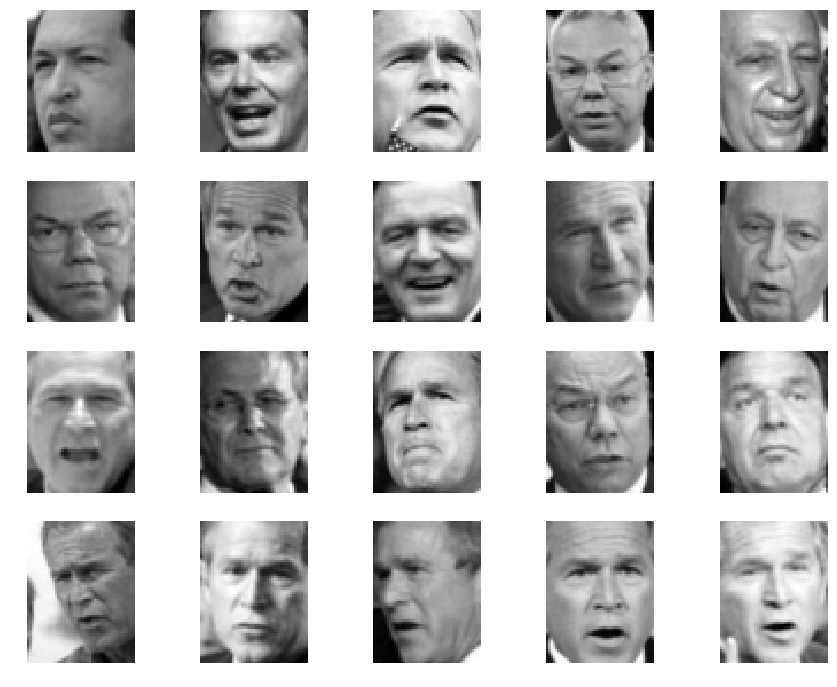

In [16]:
print "Size of Data (features,samples): ",data.shape  
plt.figure(figsize=(15,12))
def show(x):
    plt.imshow(x,cmap=plt.cm.gray)
    plt.axis('off')
for i in range(20):
    plt.subplot(4,5,i+1)
    show(data[:,i].reshape(h,w))

In [11]:
def pca(X,L):
    print "Data size (features,samples):", X.shape
    T = X.shape[1]
    mu = np.mean(X,axis=1)
    print "Mean size:", mu.shape
    X = X - mu[:,np.newaxis]
    C = 1./float(T)*np.dot(X,X.T)
    print "Covariance size:", C.shape
    evals,evecs = np.linalg.eig(C,)
    W = evecs[:,:L]
    z = np.dot(W.T,X)
    return W,z,mu,evals

def project(x,mu,W):
    z = np.dot(x - mu,W)
    reconstruction = np.dot(W,z) + mu
    return z,reconstruction
W,z,mu,evals = pca(data,  L)
print "Size of matrix of principal components (features,L):", W.shape
eigenfaces = np.reshape(W,(h,w,L))

Data size (features,samples): (2914L, 1288L)
Mean size: (2914L,)
Covariance size: (2914L, 2914L)
Size of matrix of principal components (features,L): (2914L, 25L)


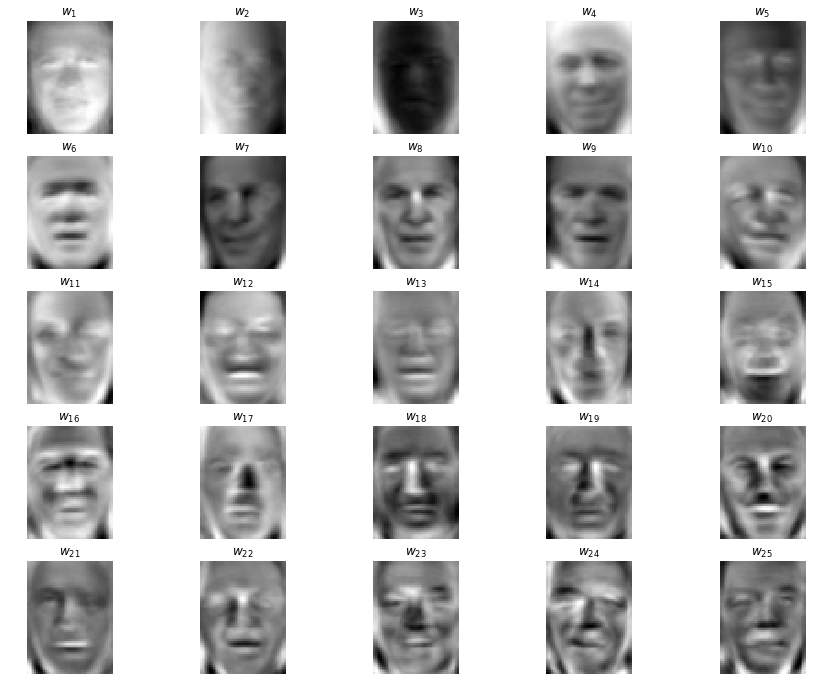

In [17]:
plt.figure(figsize=(15,12))
subplot_d = np.sqrt(L)
for i in range(L):    
    plt.subplot(subplot_d,subplot_d,i+1)
    plt.imshow(eigenfaces[:,:,i],cmap=plt.cm.gray)
    plt.title('$w_{'+str(i+1)+'}$')
    plt.axis('off')

Size of data sample:  (2914L,)
Size of z:  (25L,)
Compression rate:  116.56
Size of reconstruction:  (2914L,)


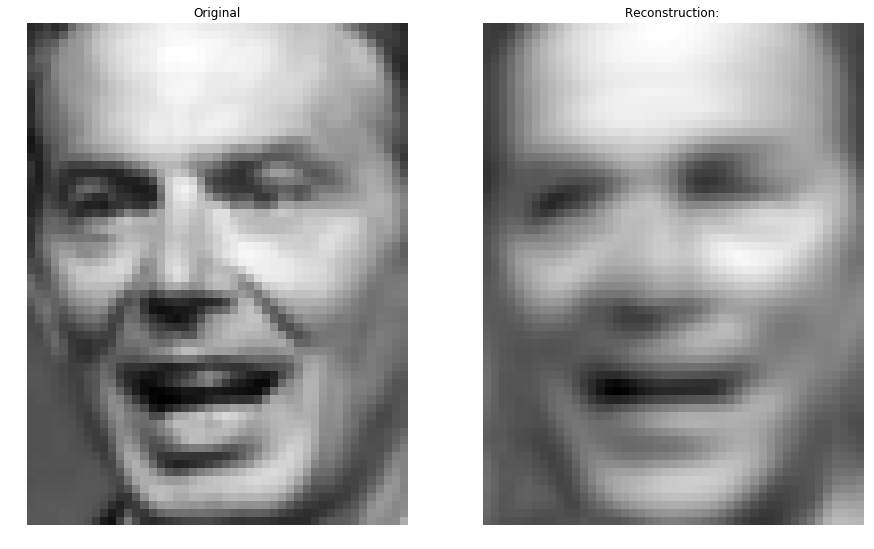

In [18]:
xt = data[:,1]
print "Size of data sample: ",xt.shape
z,reconstruction = project(xt,mu,W)
print "Size of z: ",z.shape
print "Compression rate: ", float(xt.shape[0])/float(z.shape[0])
print "Size of reconstruction: ", reconstruction.shape
plt.figure(figsize=(15,12))
plt.subplot(1,2,1)
show(xt.reshape(h,w))
plt.title('Original')
plt.subplot(1,2,2)
show(reconstruction.reshape(h,w))
plt.title('Reconstruction: ');

# Model Selection for Subspace Models

Since the subspace models are unsupervised there is no labeling available to evaluate test error

However, we can evaluate reconstruction error (negative log-likelihood) on a held out validation set

In [33]:
from sklearn.cross_validation import train_test_split
print data.shape
X_train, X_test = train_test_split(data,  test_size=0.75, random_state=1)
X_train = X_train.T
X_test = X_test.T
n_test = X_test.shape[1]
W,_,mu,evals = pca(X_train,200)
err = []
for L in range(5,100):
    error = 0.0
    for i in range(0,X_test.shape[1]):
        _,reconstruction = project(X_test[:,i],mu,W[:,:L])
        residual = X_test[:,i] - reconstruction
        error+= np.sum(residual)**2.0
    err.append(1.0/n_test*error)

(2914L, 1288L)
Data size (features,samples): (1288L, 728L)
Mean size: (1288L,)
Covariance size: (1288L, 1288L)


Text(0,0.5,'Reconstruction Error')

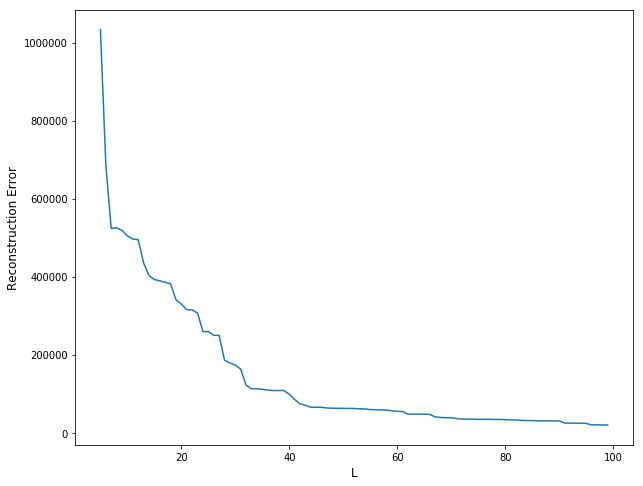

In [39]:
plt.figure(figsize=(10,8))
plt.plot(range(5,100),err)
plt.xlabel('L', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)

# PCA Example -- Eigen-Genomes

Take genome of people in Europe, Compute PCA to obtain eigen-genomes. Project people on top two eigen-genomes

<img src="./Images/europe.png" width="1500" align="center"/>

# Using Matrix Decomposition to Compute PCA

PCA uses eigen-decomposition of covariance of a centered data matrix

$$
\frac{1}{N}\XX\XX^T = \hat{\Sigma} = \VV\diag{\dd}\VV^T
$$

Where eigenvectors are columns of $\VV$ and $\dd$ is a vector of eigenvalues (eigenvector $\vv_i$ corresponds to eigenvalue $d_i$)

This matrix is of size $d \times d$ ($2914 \times 2914$ in our faces example), which can be very expensive

We will now see how to bypass computation of covariance matrix using a different decomposition

# Singular Vector Decomposition (SVD)

Frequently used in machine learning as a means to reduce computation time

Let $\XX$ be a matrix of size $d \times N$ and $K = \min(d,N)$ then we can find decomposition 

$$
\XX = \UU \SSS \VV^T
$$

where $\UU: d \times K$ and $\VV: K \times N$ are orthonormal and $\SSS: K \times K$ is diagonal

These matrices have their names
1. Columns of $\UU$ left singular vectors
2. Diagonal of $\SSS$ contains singular values
3. Columns of $\VV$ right signular vectors

# Singular Vector Decomposition (SVD)

$$
\XX = \UU \SSS \VV^T
$$

**Why is this useful?**

Remember we want to compute eigenvectors of covariance matrix

\begin{eqnarray*}
\XX\XX^T &=& (\UU \SSS \VV^T)(\UU \SSS \VV^T)^T \\
&=& \UU \SSS \underbrace{\VV^T\VV}_{I} \SSS^T \UU^T \\
&=& \UU\SSS\SSS^T\UU^T = \UU\SSS^2\UU^T
\end{eqnarray*}

Hence,
1. Left singular vector of $\XX$, $\UU$ are eigenvectors of $\XX\XX^T$
2. Right singular vector of $\XX$, $\VV$ are eigenvectors of $\XX^T\XX$

Importantly, computation of top $k$ singular values can be accomplished in $O(dN\log(k))$ time

# PCA and Clasification

* PCA is unsupervised (No knowledge about class labels)
    * Maximizes overall data variance along  a small set of directions
    * Can pick direction that makes it hard  to separate classes
* Discriminative approach (class labels known)
    * Maximizes overall data variance along  a small set of directions
    * **Linear Discriminant Analysis (LDA) – Supervised PCA**

<img src="./Images/LDA.png" width="500" align="center"/>

# Today

1. Factor Analysis
2. Principal Component Analysis 
3. Singular Vector Decomposition